# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

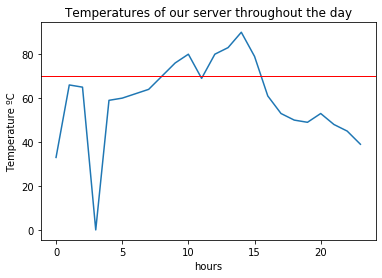

In [3]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [4]:
# assign a variable to the list of temperatures

# 1. Calculate the minimum of the list and print the value using print()

temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]

print("Minimum temperature :", min(temperatures_C), "°C")

# 2. Calculate the maximum of the list and print the value using print()

print("Maximum temperature :", max(temperatures_C), "°C")

# 3. Items in the list that are greater than 70ºC and print the result

for t in temperatures_C:
    if t >= 70:
        print(t)
        
# 4. Calculate the mean temperature throughout the day and print the result

print("Mean temperature throughout the day :", (sum(temperatures_C)/len(temperatures_C)), "°C")

# 5.1 Solve the fault in the sensor by estimating a value

#print(temperatures_C[3])
print("Estimated temperature at 3am :", (((temperatures_C[2])+(temperatures_C[4]))/2), "°C")

# 5.2 Update of the estimated value at 03:00 on the list

temperatures_C.insert(3, 62)
temperatures_C.remove(0)
print("Temperatures °C :",temperatures_C)

# Bonus: convert the list of ºC to ºFarenheit

temperatures_F = []
for t in temperatures_C:
    f = round((1.8*t + 32), 1)
    temperatures_F.append(f)

print("Temperatures °F :", temperatures_F)    

Minimum temperature : 0 °C
Maximum temperature : 83 °C
70
76
80
80
83
79
Mean temperature throughout the day : 58.833333333333336 °C
Estimated temperature at 3am : 62.0 °C
Temperatures °C : [33, 66, 65, 62, 59, 60, 62, 64, 70, 76, 80, 69, 80, 83, 68, 79, 61, 53, 50, 49, 53, 48, 45, 39]
Temperatures °F : [91.4, 150.8, 149.0, 143.6, 138.2, 140.0, 143.6, 147.2, 158.0, 168.8, 176.0, 156.2, 176.0, 181.4, 154.4, 174.2, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [5]:
# Print True or False depending on whether you would change the cooling system or not

#1 
critical_time = 4
critical_temp = 70
time = 0
change_cool_syst1 = False

while time < critical_time:
    for t in temperatures_C:
        if t >= critical_temp:
            time += 1
        elif time < critical_time:
            pass
        else:
            break
            change_cool_syst1 = True

print("1 Need for a new cooling system :", change_cool_syst1)

#2
change_cool_syst2 = False
for t in temperatures_C:
    if t >= 80:
        change_cool_syst2 = True
    else:
        pass
    
print("2 Need for a new cooling system :", change_cool_syst2)

#3

mean_temp = sum(temperatures_C)/len(temperatures_C)

change_cool_syst3 = False
if mean_temp > 65:
    change_cool_syst3 = True
else:
    pass

print("3 Need for a new cooling system :", change_cool_syst3)

1 Need for a new cooling system : False
2 Need for a new cooling system : True
3 Need for a new cooling system : False


## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [6]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
hours = 0
daytime = []
for t in temperatures_C:
    daytime.append(hours)
    hours += 1

#print(temperatures_C)
#print(daytime)

dic_temp_day = dict(zip(daytime, temperatures_C))
print("Temperatures throughout the day :", dic_temp_day)

exceed_temp = []
for h, t in dic_temp_day.items():
    if t >= 70:
        exceed_temp.append(h)
        
print("Hours when temperature exceeded 70°C :", exceed_temp)

Temperatures throughout the day : {0: 33, 1: 66, 2: 65, 3: 62, 4: 59, 5: 60, 6: 62, 7: 64, 8: 70, 9: 76, 10: 80, 11: 69, 12: 80, 13: 83, 14: 68, 15: 79, 16: 61, 17: 53, 18: 50, 19: 49, 20: 53, 21: 48, 22: 45, 23: 39}
Hours when temperature exceeded 70°C : [8, 9, 10, 12, 13, 15]


In [14]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
conseq = []
for t in temperatures_C:
    if t >= 70:
        conseq.append(1)
    else:
        conseq.append(0)

print(conseq)

from itertools import groupby

count_conseq = [len(list(c[1])) for c in groupby(conseq) if c[0]==1]
print(count_conseq)

change_cool_syst4 = False
for i in count_conseq:
    if i >= 4:
        change_cool_syst4 = True
    else:
        pass

print('Is the condition met ?', change_cool_syst4)
    

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 2, 1]
Is the condition met ? False


In [59]:
# 3. Average of each of the lists (ºC and ºF). How they relate?

mean_t_C = sum(temperatures_C)/len(temperatures_C)
mean_t_F = sum(temperatures_F)/len(temperatures_F)
#          = (mean_t_c*1.8)+32
print(mean_t_C)
print(mean_t_F)

61.416666666666664
142.54999999999998


In [61]:
# 4. Standard deviation of each of the lists. How they relate?

import statistics
import numpy as np

print(np.std(temperatures_C))
print(np.std(temperatures_F))

# np.std(temperatures_F) = np.std(temperatures_C)*sqrt(1.8) + sqrt(32)


13.050915251004005
23.491647451807204
